In [1]:
import pandas as pd
import nltk

In [2]:
df_result = pd.read_csv("data/results.csv", index_col=0)
df_result.head(1)

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news,hate_keyword_count,hate_keyword_count_unique,hate_keyword,hate_keyword_sources
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,not hate speech,neither,neither,not hate speech,hate speech,not hate speech,0,0,[],[]


In [3]:
def replace_val(df):
    df = df.replace('neither',0)
    df = df.replace('not hate speech',0)
    df = df.replace('offensive language',1)
    df = df.replace('hate speech',2)
    return df

In [4]:
def calculate_keyword_formular(count):
    if count == 1:
        return 1
    elif count == 2:
        return 2
    elif count==0:
        return 0
    else:
        return 3

In [5]:
df_result['we_label_fox_news'] = replace_val(df_result['we_label_fox_news'])
df_result['we_label_twitter'] = replace_val(df_result['we_label_twitter'])
df_result['bert_label_twitter'] = replace_val(df_result['bert_label_twitter'])
df_result['bert_label_fox_news'] = replace_val(df_result['bert_label_fox_news'])
df_result['lstm_label_twitter'] = replace_val(df_result['lstm_label_twitter'])
df_result['lstm_label_fox_news'] = replace_val(df_result['lstm_label_fox_news'])

In [7]:
df_result['keyword_count_formular'] = df_result['hate_keyword_count_unique'].apply(calculate_keyword_formular)

In [8]:
df_result.head(1)

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news,hate_keyword_count,hate_keyword_count_unique,hate_keyword,hate_keyword_sources,keyword_count_formular
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,0,0,0,0,2,0,0,0,[],[],0


In [14]:
df_result['combined_results'] = (df_result['we_label_fox_news']
                                    +df_result['we_label_twitter']
                                    +df_result['bert_label_twitter']
                                    +df_result['bert_label_fox_news']
                                    +df_result['lstm_label_twitter']
                                    +df_result['lstm_label_fox_news']
                                    +df_result['keyword_count_formular'])

In [16]:
df_result['combined_normlized'] = round(df_result['combined_results']/df_result['combined_results'].max(),2)

In [17]:
df_result.head(1)

,movie_name,index,utterance,count_utterances,tag,we_label_fox_news,we_label_twitter,bert_label_twitter,bert_label_fox_news,lstm_label_twitter,lstm_label_fox_news,hate_keyword_count,hate_keyword_count_unique,hate_keyword,hate_keyword_sources,keyword_count_formular,combined_results,combined_normlized
0,12 Angry Men,0,"Thank you very much, sir.",2065,racism,0,0,0,0,2,0,0,0,[],[],0,2,0.15


# Analysis

# Creating Movie Metadata Dataframe

In [64]:
mean_hate_score_by_movie_df = df_result.groupby('movie_name').combined_normlized.mean().to_frame('mean_hate_score').reset_index().sort_values(by='mean_hate_score', ascending=False)

In [65]:
movie_metadata = df_result.drop_duplicates(subset=['movie_name'])[['movie_name', 'count_utterances', 'tag']]

In [66]:
movie_metadata = movie_metadata.merge(mean_hate_score_by_movie_df, on='movie_name')

In [68]:
movie_metadata.head()

,movie_name,count_utterances,tag,mean_hate_score
0,12 Angry Men,2065,racism,0.200358
1,42,1288,racism,0.199410
2,A Bronx Tale,1961,racism,0.228950
3,A Time to Kill,2219,racism,0.202817
4,AI Artificial Intelligence,747,racism,0.193829


# Mean hate_score of movies distributed by tags

In [71]:
movie_metadata.groupby('tag').mean_hate_score.max()

tag
friendship     0.248358
hate_speech    0.286429
racism         0.252953
Name: mean_hate_score, dtype: float64

In [72]:
movie_metadata.groupby('tag').count_utterances.mean()

tag
friendship     1460.432432
hate_speech    1440.750000
racism         1414.210526
Name: count_utterances, dtype: float64

In [73]:
movie_metadata.tag.value_counts()

racism         114
friendship     111
hate_speech     12
Name: tag, dtype: int64

(0.0, 1.0)

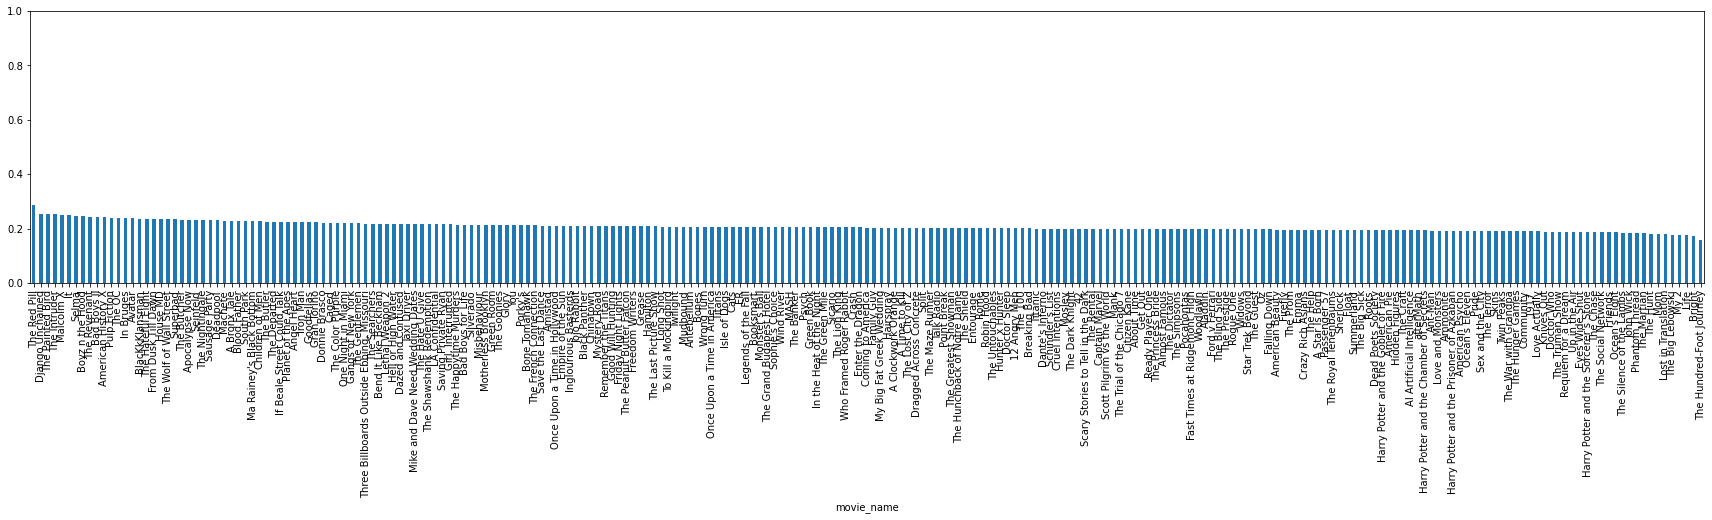

In [81]:
ax = movie_metadata.groupby('movie_name').mean_hate_score.max().sort_values(ascending=False).plot(kind='bar', figsize=(30,5))
ax.set_ylim([0, 1])

(0.0, 1.0)

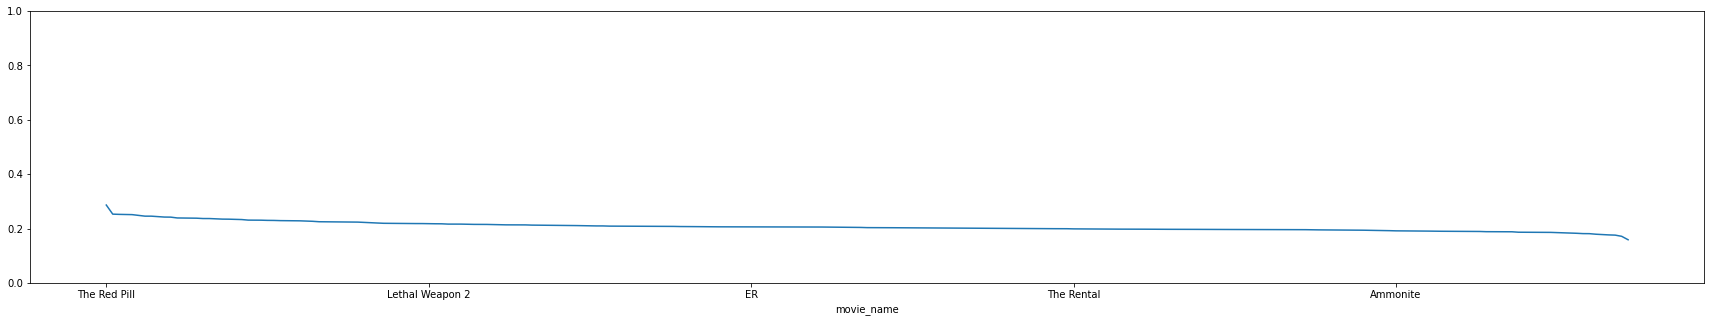

In [82]:
ax = movie_metadata.groupby('movie_name').mean_hate_score.max().sort_values(ascending=False).plot(kind='line', figsize=(30,5))
ax.set_ylim([0, 1])